## Question 2: Calibration

In [1]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.calibration import calibration_curve


In [2]:
# Load train/test data from npz files
with np.load("calibration.npz") as data:
    X_train = data["X_train"]
    X_test = data["X_test"]
    y_train = data["y_train"]
    y_test = data["y_test"]

### Question 2(a): Test error rates

In [6]:
#Add code here

lr = LogisticRegression(C=1.0, max_iter=1000)
lr.fit(X_train, y_train)
ypred_lr = lr.predict(X_test)
error_lr = 1 - np.mean(ypred_lr == y_test)

nb = GaussianNB()
nb.fit(X_train, y_train)
ypred_nb = nb.predict(X_test)
error_nb = 1 - np.mean(ypred_nb == y_test)

print(f"Logistic Regression Test Error Rate: {error_lr:.4f}")
print(f"Gaussian Naive Bayes Test Error Rate: {error_nb:.4f}")


Logistic Regression Test Error Rate: 0.1369
Gaussian Naive Bayes Test Error Rate: 0.1349


### Question 2(b): Calibration Curves

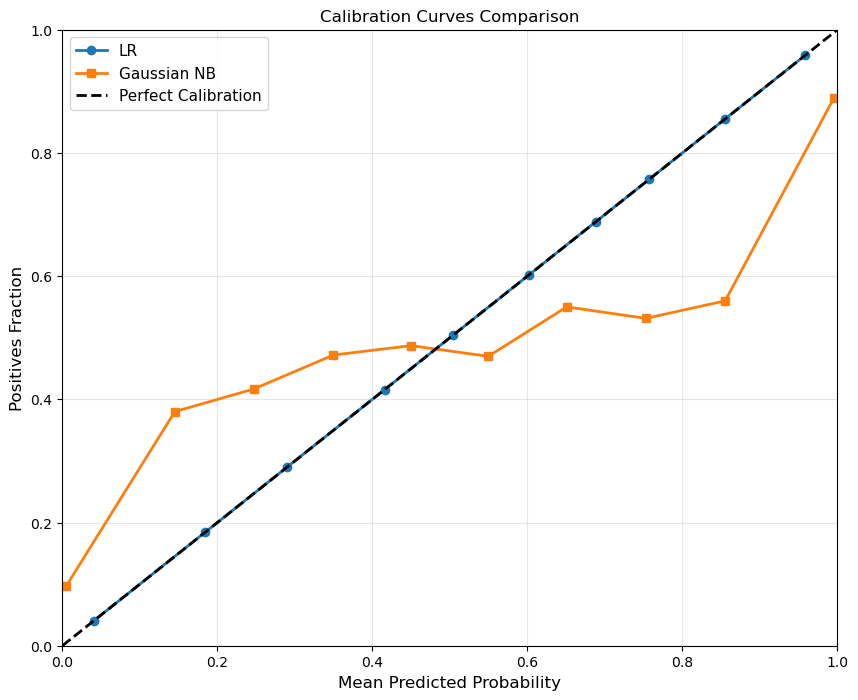

In [ ]:
#Add code here

pred_prob_lr = lr.predict_proba(X_test)[:, 1]
pos_lr, meanpred_lr = calibration_curve(y_test, pred_prob_lr, n_bins=10)
pred_prob_nb = nb.predict_proba(X_test)[:, 1] 
pos_nb, meanpred_nb = calibration_curve(y_test, pred_prob_nb, n_bins=10)


plt.figure(figsize=(10, 8))
plt.plot(pos_lr, pos_lr, 'o-', label='LR', linewidth=2, markersize=6)
plt.plot(meanpred_nb, pos_nb, 's-', label='Gaussian NB', linewidth=2, markersize=6)
plt.plot([0, 1], [0, 1], 'k--', label='Perfect Calibration', linewidth=2)
plt.xlabel('Mean Predicted Probability', fontsize=12)
plt.ylabel('Positives Fraction', fontsize=12)
plt.title('Calibration Curves Comparison', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()


### Question 2(c): Expected Calibration Error

In [9]:
#Add code here
def expected_calibration_error(y_true, y_prob, n_bins=10):
    bounds = np.linspace(0, 1, n_bins + 1)
    lows,highs = bounds[:-1],bounds[1:]
    
    calib_error = 0
    for low, high in zip(lows, highs):
        bin_vals = (y_prob > low) & (y_prob <= high)
        bin_prop = bin_vals.mean()
        
        if bin_prop > 0:
            bin_acc = y_true[bin_vals].mean()
            bin_avg_conf = y_prob[bin_vals].mean()
            calib_error += np.abs(bin_avg_conf - bin_acc) * bin_prop
    
    return calib_error

calib_err_lr = expected_calibration_error(y_test, pred_prob_lr)
calib_err_nb = expected_calibration_error(y_test, pred_prob_nb)


print(f"Logistic Regression Expected Calibration Error: {calib_err_lr:.4f}")
print(f"Gaussian Naive Bayes Expected Calibration Error: {calib_err_nb:.4f}")


Logistic Regression Expected Calibration Error: 0.0201
Gaussian Naive Bayes Expected Calibration Error: 0.1065
